<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [4]:
import re
import string
# This is for removing html tags
from bs4 import BeautifulSoup
# For instructors function to count tokens/words
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
# OG imports 8)
import pandas as pd
import numpy as np
import spacy

In [8]:

import spacy
nlp = spacy.load("en_core_web_lg")

In [9]:
df = pd.read_csv('./data/job_listings.csv', index_col=0)
df.head()


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level


## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [11]:
def strip(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_t = soup.get_text(separator=" ")
    return stripped_t

df['description_clean'] = df['description'].apply(strip)

df['description_clean'] = df['description_clean'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')

In [12]:
df.head()

,description,title,description_clean
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b"" Job Requirements: Conceptual understanding..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b' Job Description As a Data Scientist 1, ..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b' As a Data Scientist you will be working on ...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b' $4,969 - $6,756 a month Contract Under the ..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b' Location: USA multiple locations 2+ y...


In [13]:
stop_w = nlp.Defaults.stop_words.union([
    'it','the', 'b\'', 'b\"', '\\n', 'b',
    'place', 'come', '$', '+', ' '])
def lemma(text):
    
    lemmas = []
   
    outy = nlp(text)
    for token in outy:
     
        if ((token.is_stop == False) and (token.text not in stop_w) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas
df['description_token'] = df['description_clean'].apply(lemma)

In [14]:
df.head()

,description,title,description_clean,description_token
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b"" Job Requirements: Conceptual understanding...","[job, requirement, conceptual, understanding, ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b' Job Description As a Data Scientist 1, ...","[job, description, , Data, Scientist, 1, h..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b' As a Data Scientist you will be working on ...,"[Data, scientist, work, consult, business, res..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b' $4,969 - $6,756 a month Contract Under the ...","[4,969, 6,756, month, Contract, general, super..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b' Location: USA multiple locations 2+ y...,"[location, USA, , multiple, location, , ..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
# CountVectorizer 

data = list(df.description_clean)
v = CountVectorizer(stop_words=stop_w, min_df=0.05, max_df=0.90,lowercase=True)
v.fit(data)
v_dtm = v.transform(data)
dtm = pd.DataFrame(v_dtm.todense(), columns=v.get_feature_names())

/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [16]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,workplace,works,world,write,writing,written,www,year,years,york
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,2,0,2,1,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# def tokenize(document):
#     doc = nlp(document)
#     return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

# tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.25, max_df=0.95, ngram_range=(1,2))
# tfidf_v = tfidf.fit_transform(data)
# dtm2 = pd.DataFrame(tfidf_v.todense(), columns=tfidf.get_feature_names())

In [18]:
# dtm2.head()

,,,,,,experience,s,experience,work,+,...,value,veteran,veteran status,visualization,way,work,world,write,year,year experience
0,0.263181,0.458772,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.000000,0.078097,0.000000,0.136267,0.000000,0.0
1,0.798243,0.089198,0.040063,0.179269,0.0,0.0,0.050953,0.070012,0.038699,0.032287,...,0.0,0.000000,0.00000,0.0,0.072721,0.109326,0.056749,0.095379,0.021743,0.0
2,0.418128,0.000000,0.081843,0.000000,0.0,0.0,0.000000,0.143026,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.000000,0.148892,0.000000,0.000000,0.000000,0.0
3,0.277725,0.060516,0.135903,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.116393,0.13178,0.0,0.000000,0.123619,0.000000,0.000000,0.073759,0.0
4,0.000000,0.494568,0.000000,0.177496,0.0,0.0,0.000000,0.000000,0.000000,0.223774,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.150699,0.0


## 4) Visualize the most common word counts

In [19]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
wc = count(df['description_token'])

In [20]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,,394,4472,1.0,0.031586,0.031586,0.924883
33,datum,409,2921,2.0,0.020631,0.052217,0.960094
80,experience,410,1950,3.0,0.013773,0.065990,0.962441
36,work,385,1627,4.0,0.011491,0.077481,0.903756
100,,342,1575,5.0,0.011124,0.088605,0.802817


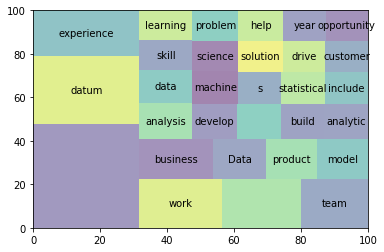

In [21]:
squarify.plot(sizes=wc.iloc[:30]['pct_total'], label=wc['word'],alpha=.5);


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [22]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.25, max_df=0.95, ngram_range=(1,2))
tfidf_v = tfidf.fit_transform(data)
dtm2 = pd.DataFrame(tfidf_v.todense(), columns=tfidf.get_feature_names())

In [23]:
dtm2.head()

,,,,,,experience,s,experience,work,+,...,value,veteran,veteran status,visualization,way,work,world,write,year,year experience
0,0.263181,0.458772,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.000000,0.078097,0.000000,0.136267,0.000000,0.0
1,0.798243,0.089198,0.040063,0.179269,0.0,0.0,0.050953,0.070012,0.038699,0.032287,...,0.0,0.000000,0.00000,0.0,0.072721,0.109326,0.056749,0.095379,0.021743,0.0
2,0.418128,0.000000,0.081843,0.000000,0.0,0.0,0.000000,0.143026,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.000000,0.148892,0.000000,0.000000,0.000000,0.0
3,0.277725,0.060516,0.135903,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.116393,0.13178,0.0,0.000000,0.123619,0.000000,0.000000,0.073759,0.0
4,0.000000,0.494568,0.000000,0.177496,0.0,0.0,0.000000,0.000000,0.000000,0.223774,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.150699,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [24]:
Knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
Knn.fit(dtm2)


NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [26]:
Knn.kneighbors([dtm2.iloc[100]])

(array([[0.        , 0.        , 0.84990509, 0.88858531, 0.89277913]]),
 array([[ 47, 100, 287, 341, 185]]))

In [27]:
data[150][:100]


"b' Contract 1 year+ contract   Data Scientist     contract   Early Clinical Development (ECD) depart"

In [32]:
example = ["""
A data scientist is someone who makes value out of data. ... Data scientist duties typically include creating various machine learning-based 
tools or processes within the company, such as recommendation engines or automated lead scoring systems. 
People within this role should also be able to perform statistical analysis.
"""] # Needs to be a string in a list or tfidf screams

new = tfidf.transform(example)

a = Knn.kneighbors(new.todense())

In [33]:
def read_results(arr):
    arr_in = arr[1][0]
    x = 1
    for n in arr_in:
        print(f'{x}: {data[n][:200]}\n')
        x+=1

In [34]:
read_results(a)


1: b' The Data Scientist is a critical position within DSS and in the Data organization who specializes in applying machine learning methods to meet optimization, personalization, recommendations and eff

2: b' $40 - $42 an hour Part-time Contractor Position - part time, can work remotely $40.- $42./hour depending on experience  Alelo has an opening for a Junior Data Scientist, working with data from our 

3: b' $40 - $42 an hour Part-time Contractor Position - part time, can work remotely $40.- $42./hour depending on experience  Alelo has an opening for a Junior Data Scientist, working with data from our 

4: b" Bachelor or Master's degree in highly quantitative field (CS, machine learning, mathematics, statistics) or equivalent experience. Experience with R, Python, Weka, SAS, Matlab or other statistical/

5: b' Contract 1 year+ contract   Data Scientist     contract   Early Clinical Development (ECD) department is seeking a Data Scientist reporting to the Predictive Analytics (gPA) 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 